In [3]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt

In [4]:
from get_aq_data import get_flo_data, ID_to_name, TICKS_TWO_HOURLY

In [5]:
data, hourly_mean, daily_mean = get_flo_data()

In [6]:
subset = data['2019-04-15':'2019-05-30']
subset = subset.drop('nesta-8', axis=1)
subset = subset.mean(axis=1)
just_sundays = subset[subset.index.dayofweek == 6].to_frame('Mean')

In [7]:
just_sundays['Marathon'] = 'Non-Marathon'
just_sundays.loc['2019-05-05', 'Marathon'] = 'Marathon'

In [8]:
marathon = just_sundays[just_sundays['Marathon'] == 'Marathon']
marathon = marathon.groupby(marathon.index.time).mean()
non_marathon = just_sundays[just_sundays['Marathon'] == 'Non-Marathon']
non_marathon_mean = non_marathon.groupby(non_marathon.index.time).mean()
non_marathon_std = non_marathon.groupby(non_marathon.index.time).std()

In [9]:
marathon = marathon['Mean']
non_marathon_mean = non_marathon_mean['Mean']
non_marathon_std = non_marathon_std['Mean']

In [10]:
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

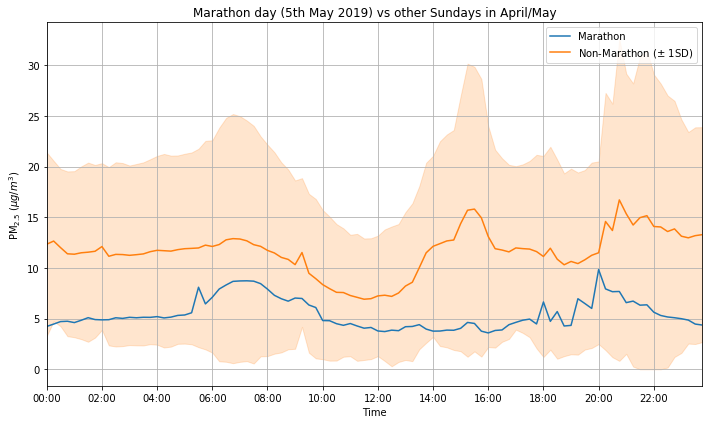

In [11]:
ax = marathon.plot(label='Marathon', figsize=(10,6))
non_marathon_mean.plot(ax=ax, label='Non-Marathon ($\pm$ 1SD)')
plt.legend()
filled_top = non_marathon_mean + non_marathon_std
filled_bottom = non_marathon_mean - non_marathon_std
filled_bottom[filled_bottom < 0] = 0
plt.fill_between(non_marathon_mean.index, filled_bottom, filled_top, alpha=0.2, color=colors[1])
plt.suptitle('')
plt.title('Marathon day (5th May 2019) vs other Sundays in April/May')
plt.ylabel(r'$\mathrm{PM}_{2.5}$ ($\mu g / m^3$)')
plt.xlabel('Time')
plt.xticks(TICKS_TWO_HOURLY)
plt.grid()
plt.tight_layout()
plt.savefig('graphs/MarathonTimeSeries_Comparison.png', dpi=300)